In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [49]:
df_train.isnull().sum()

x    0
y    1
dtype: int64

In [71]:
filt = (df_train.isnull())
filt = filt['y'].values
df_train[filt == True].index

Index([213], dtype='int64')

In [70]:
df_train.iloc[213,1]

nan

In [74]:
df_train.drop(index = 213, inplace = True)

In [102]:
filt = (df_train.duplicated().values)
df_train[filt]

,x,y


In [92]:
df_train.duplicated()

699

In [79]:
X = df_train[['x']]
X

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [80]:
y = df_train[['y']]
y

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


In [81]:
model = LinearRegression()

In [82]:
model.fit(X,y)

LinearRegression()

In [140]:
model.score(X,y) #Internally calculated y_predict usingg X and compares it wth y(actual)

0.9907015319025518

In [107]:
slope = model.coef_
slope = slope[0][0]
slope

1.0006563818563035

In [113]:
intercept = model.intercept_
intercept = intercept[0]
intercept

-0.10726546430095141

In [119]:
print("Equation of the line: ",'y = '+ str(slope.round(2))+'x'+ str(intercept.round(2)))

Equation of the line:  y = 1.0x-0.11


In [120]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [123]:
y_predict = model.predict(df_test[['x']])
y_predict = pd.DataFrame(y_predict)
y_predict

,0
0,76.943276
1,20.906519
2,21.907175
3,19.905862
4,35.916364
...,...
295,70.939338
296,45.922928
297,54.928836
298,61.933430


In [130]:
outcome = pd.concat([y_predict, df_test[['y']]], ignore_index = True, axis = 1)
outcome

,0,1
0,76.943276,79.775152
1,20.906519,23.177279
2,21.907175,25.609262
3,19.905862,17.857388
4,35.916364,41.849864
...,...,...
295,70.939338,68.545888
296,45.922928,47.334876
297,54.928836,54.090637
298,61.933430,63.297171


In [133]:
outcome.rename(columns = {0:"Predicted", 1: "Actual"}, inplace = True)

In [135]:
outcome.head()

,Predicted,Actual
0,76.943276,79.775152
1,20.906519,23.177279
2,21.907175,25.609262
3,19.905862,17.857388
4,35.916364,41.849864


In [138]:
cost = mean_squared_error(df_test[['y']], y_predict)
cost

9.432922192039317

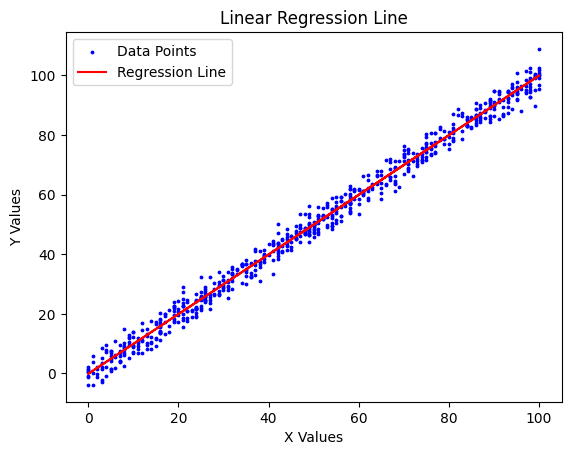

In [154]:
plt.scatter(X, y, color = 'blue', label = "Data Points", s = 3)
plt.plot(df_test[['x']], y_predict, color = 'red', label = "Regression Line")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Linear Regression Line")
plt.legend()
plt.show()

In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(df_test[['y']], y_predict)
mse = mean_squared_error(df_test[['y']], y_predict)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

2.4157718500412595
9.432922192039317
3.0713062680298293
